Once the data is preprocessed, the next step is to transform it into a format that data mining techniques can analyze. This step involves reducing the data dimensionality, aggregating the data, normalizing it, and discretizing it to prepare it for further analysis.

In [1]:
import utils
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')
import pickle as pkl
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Load data
df: pd.DataFrame = utils.load_original_data()

In [2]:
# standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# save data
with open('../artifacts/fetal_health_preprocessed.pkl', 'wb') as f:
    pkl.dump(df_scaled, f)

# save scaler
with open('../artifacts/scaler.pkl', 'wb') as f:
    pkl.dump(scaler, f)

### Feature Importance

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.                                    

The scores are useful and can be used in a predictive modeling problem for multiple situations:
- Better understanding the data.
- Better understanding a model.
- Reducing the number of input features (dimensionality reduction).

#### Random Forest Classification Feature Importance

Feature: baseline value, Score: 0.03526
Feature: accelerations, Score: 0.04956
Feature: fetal_movement, Score: 0.01904
Feature: uterine_contractions, Score: 0.04201
Feature: light_decelerations, Score: 0.00927
Feature: severe_decelerations, Score: 0.00084
Feature: prolongued_decelerations, Score: 0.04913
Feature: abnormal_short_term_variability, Score: 0.12543
Feature: mean_value_of_short_term_variability, Score: 0.13114
Feature: percentage_of_time_with_abnormal_long_term_variability, Score: 0.12507
Feature: mean_value_of_long_term_variability, Score: 0.04316
Feature: histogram_width, Score: 0.03264
Feature: histogram_min, Score: 0.03490
Feature: histogram_max, Score: 0.03005
Feature: histogram_number_of_peaks, Score: 0.02326
Feature: histogram_number_of_zeroes, Score: 0.00501
Feature: histogram_mode, Score: 0.05749
Feature: histogram_mean, Score: 0.08759
Feature: histogram_median, Score: 0.05725
Feature: histogram_variance, Score: 0.03395
Feature: histogram_tendency, Score: 0.00794


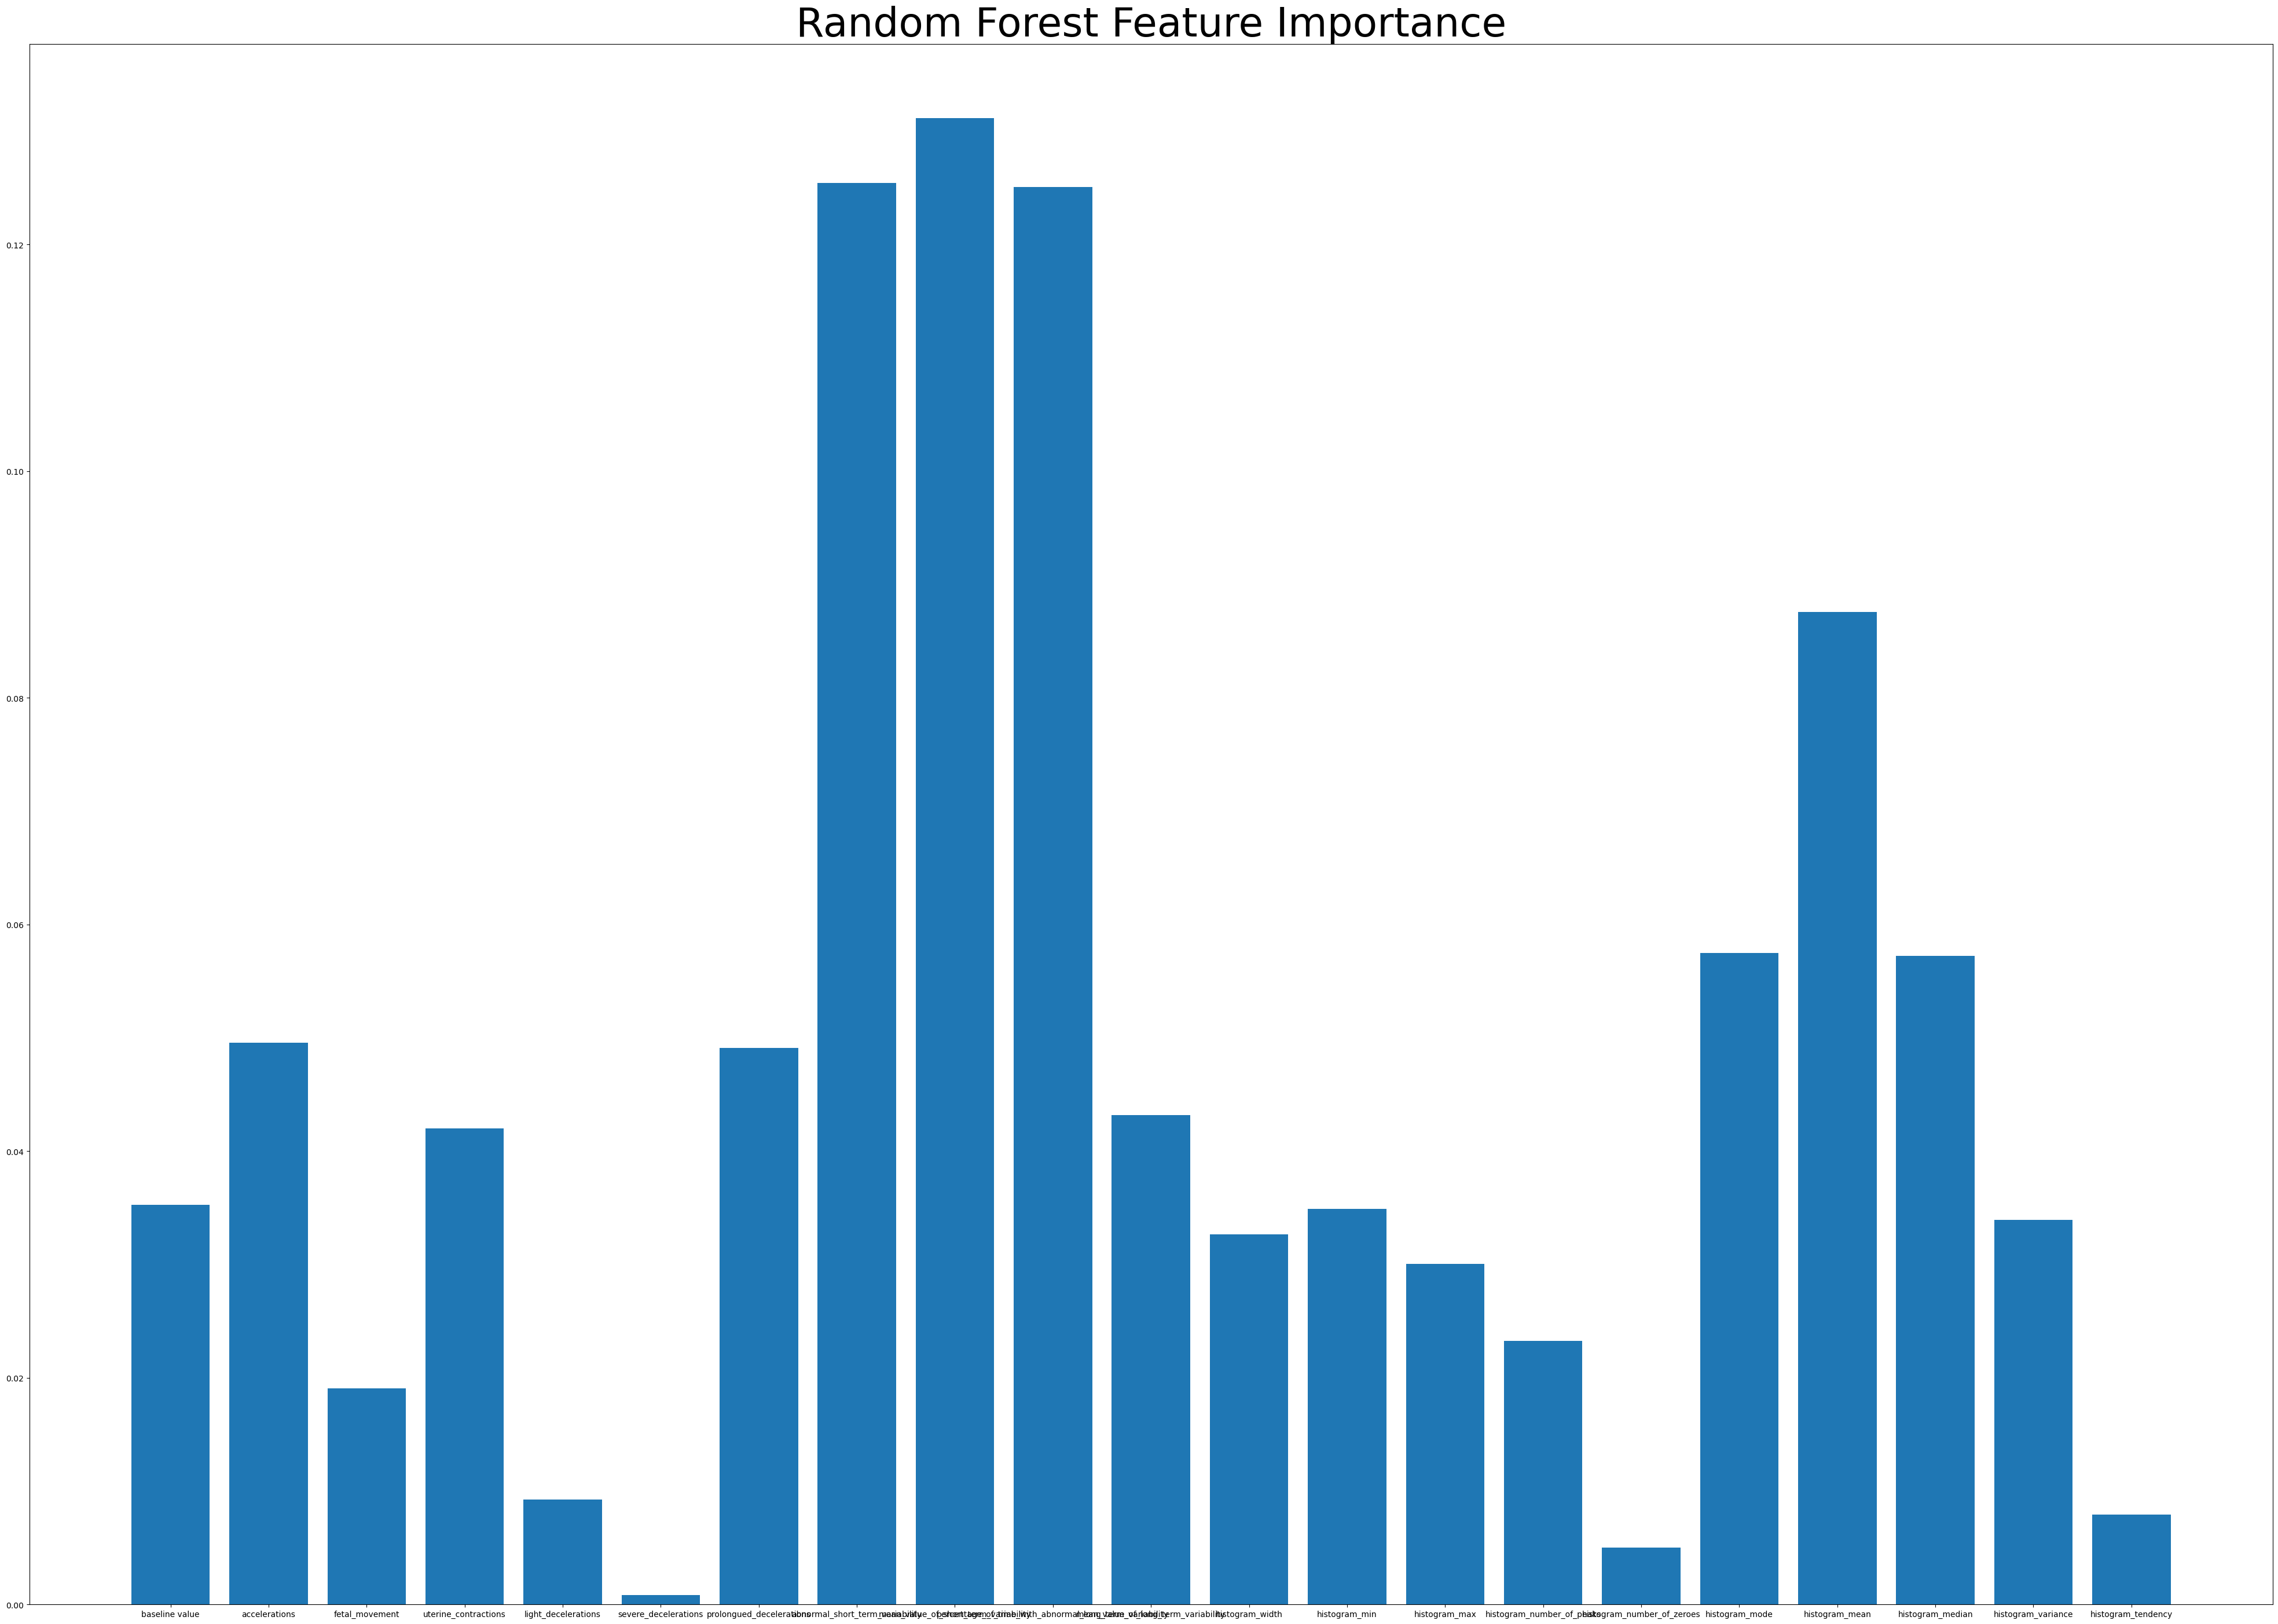

In [17]:
rf_top5_features, rf_highest_importances = utils.feature_importance(rf, X_train, y_train, df, 'Random Forest Feature Importance')

#### XGBoost Classification Feature Importance

Feature: baseline value, Score: 0.03077
Feature: accelerations, Score: 0.06828
Feature: fetal_movement, Score: 0.02117
Feature: uterine_contractions, Score: 0.04178
Feature: light_decelerations, Score: 0.01367
Feature: severe_decelerations, Score: 0.00000
Feature: prolongued_decelerations, Score: 0.05745
Feature: abnormal_short_term_variability, Score: 0.07057
Feature: mean_value_of_short_term_variability, Score: 0.24977
Feature: percentage_of_time_with_abnormal_long_term_variability, Score: 0.07137
Feature: mean_value_of_long_term_variability, Score: 0.01595
Feature: histogram_width, Score: 0.01295
Feature: histogram_min, Score: 0.01421
Feature: histogram_max, Score: 0.02428
Feature: histogram_number_of_peaks, Score: 0.03643
Feature: histogram_number_of_zeroes, Score: 0.01322
Feature: histogram_mode, Score: 0.03033
Feature: histogram_mean, Score: 0.17044
Feature: histogram_median, Score: 0.03542
Feature: histogram_variance, Score: 0.01641
Feature: histogram_tendency, Score: 0.00550


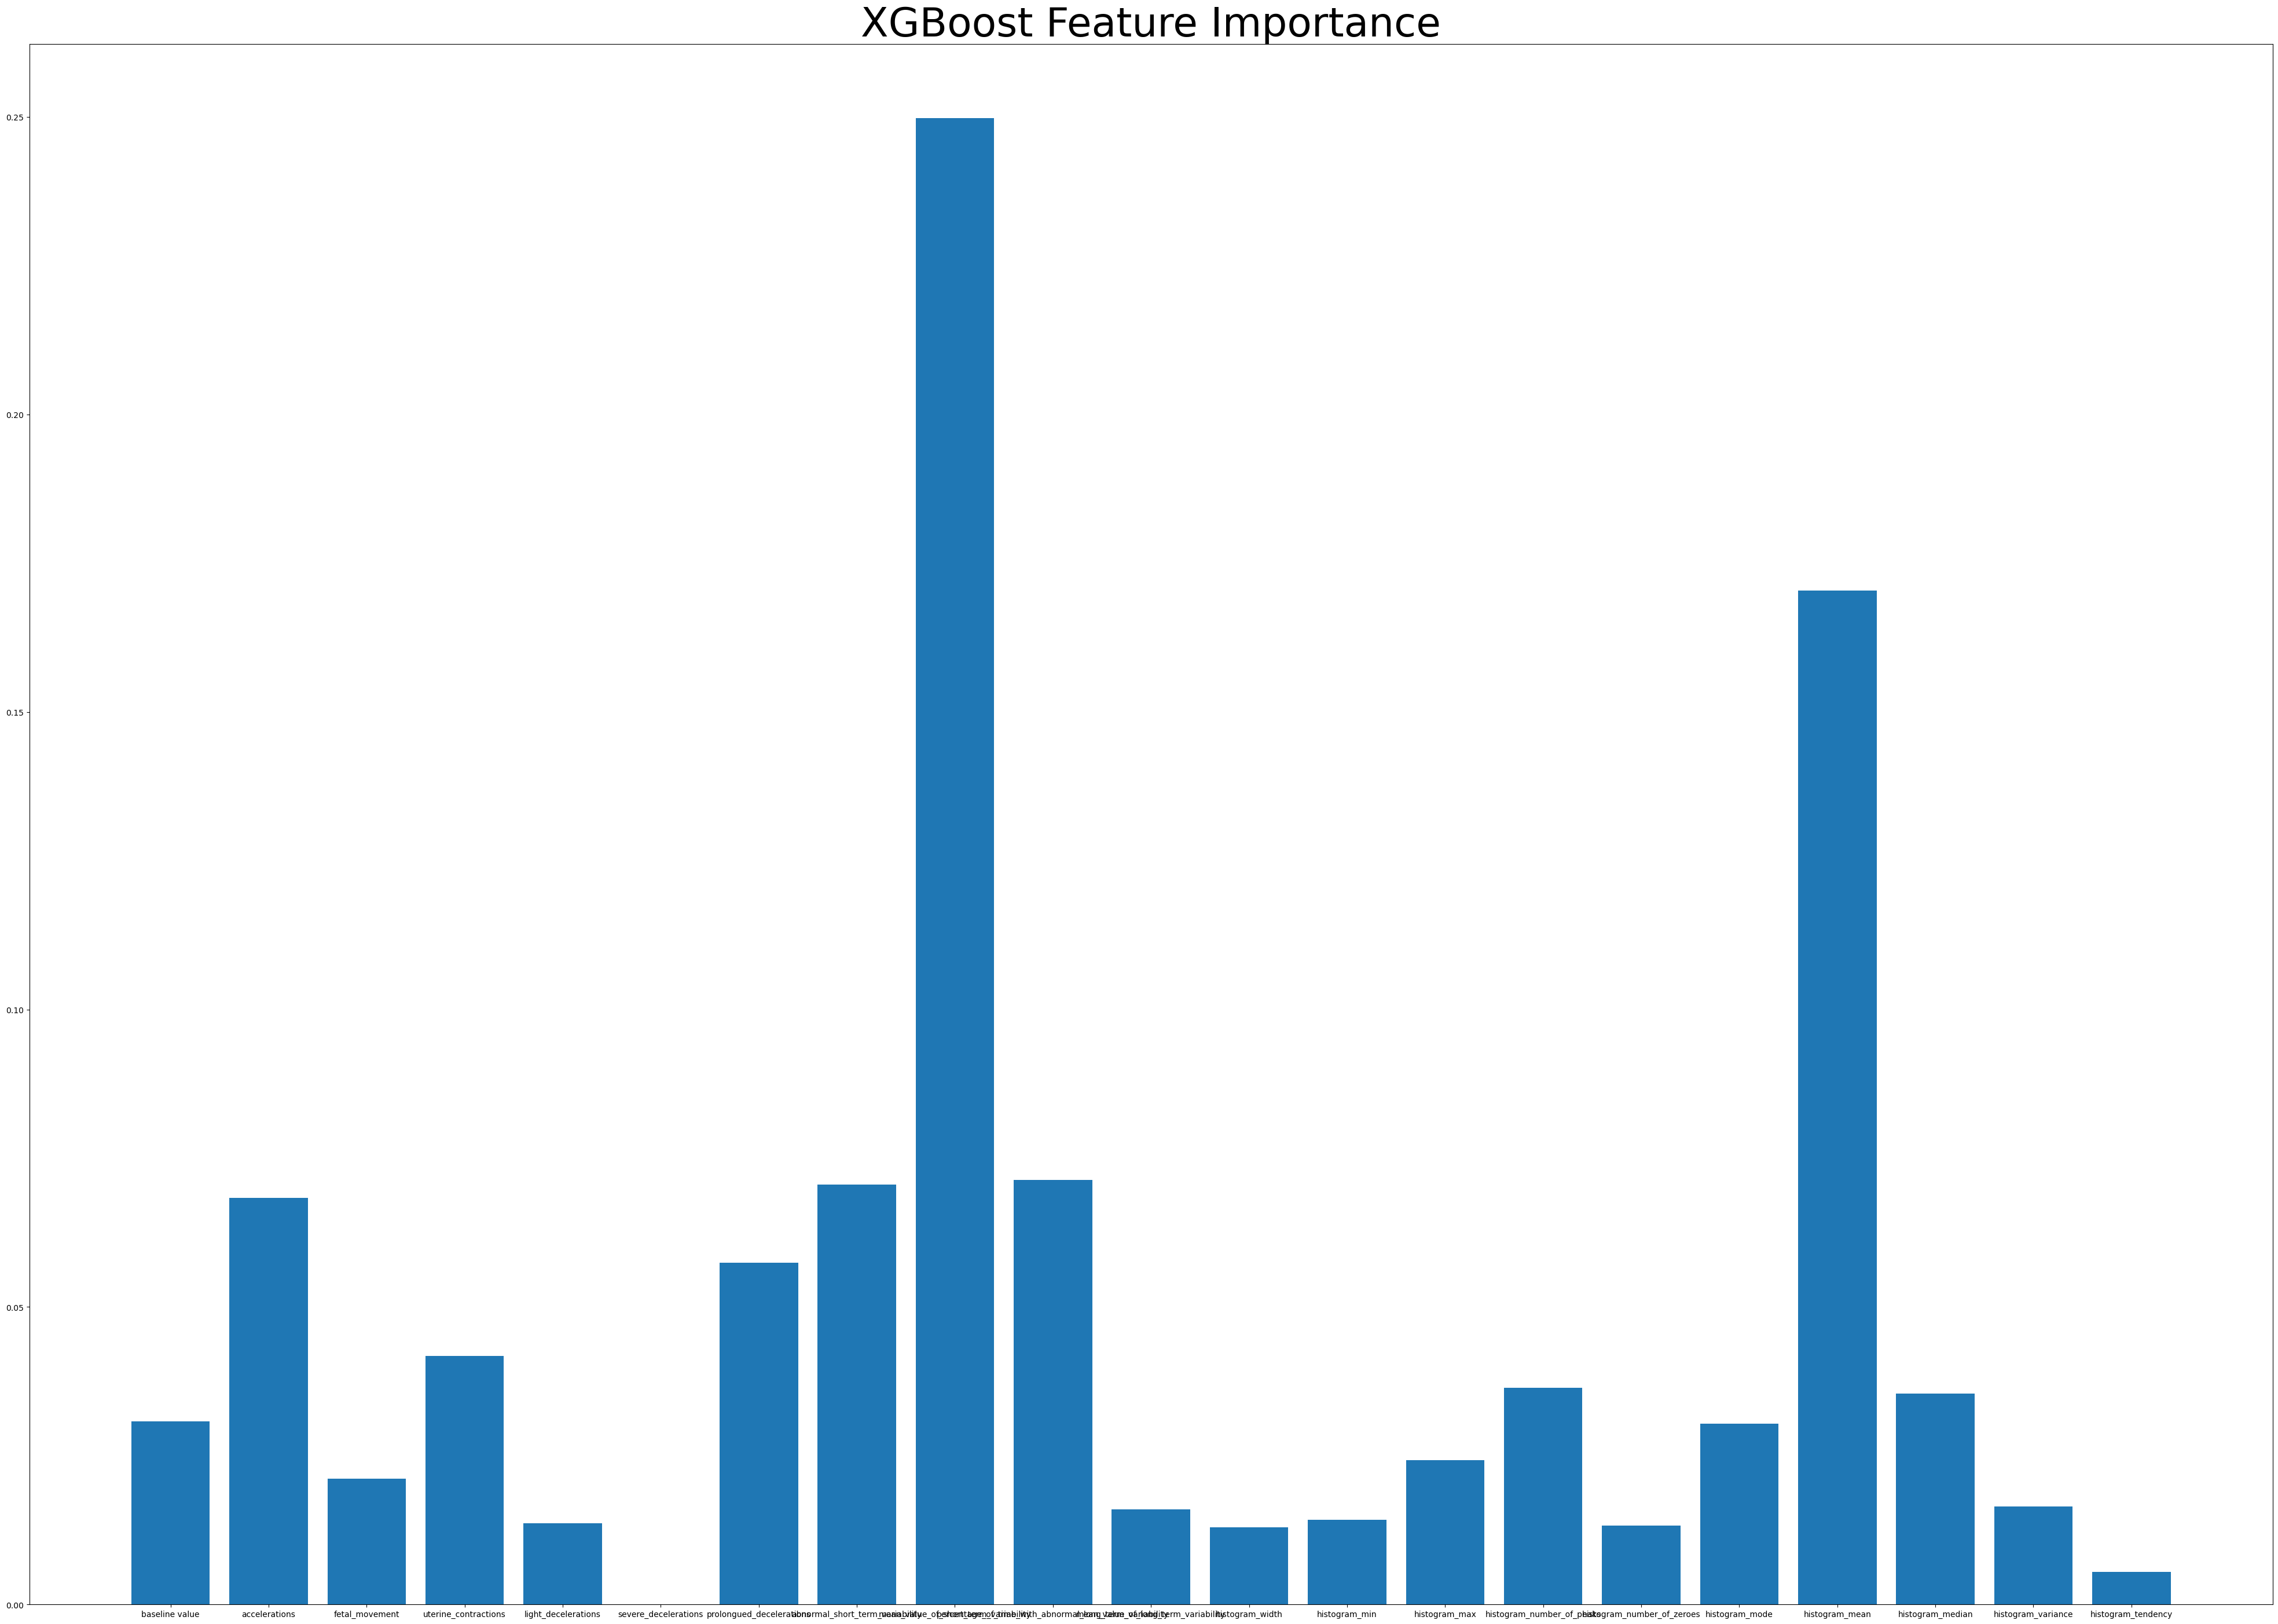

In [15]:
XGB_top5_features, XGB_highest_importances = utils.feature_importance(xgb_model, X_train, y_train, df, 'XGBoost Feature Importance')

Random Forest top 5 features:  Index(['mean_value_of_short_term_variability',
       'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_mean', 'histogram_mode'],
      dtype='object') 
importance:  [0.13113719 0.12542964 0.12507424 0.08758902 0.0574877 ]



XGBoost top 5 features:  Index(['mean_value_of_short_term_variability', 'histogram_mean',
       'percentage_of_time_with_abnormal_long_term_variability',
       'abnormal_short_term_variability', 'accelerations'],
      dtype='object') importance:  [0.24977164 0.17044269 0.07137323 0.07056996 0.06828175]


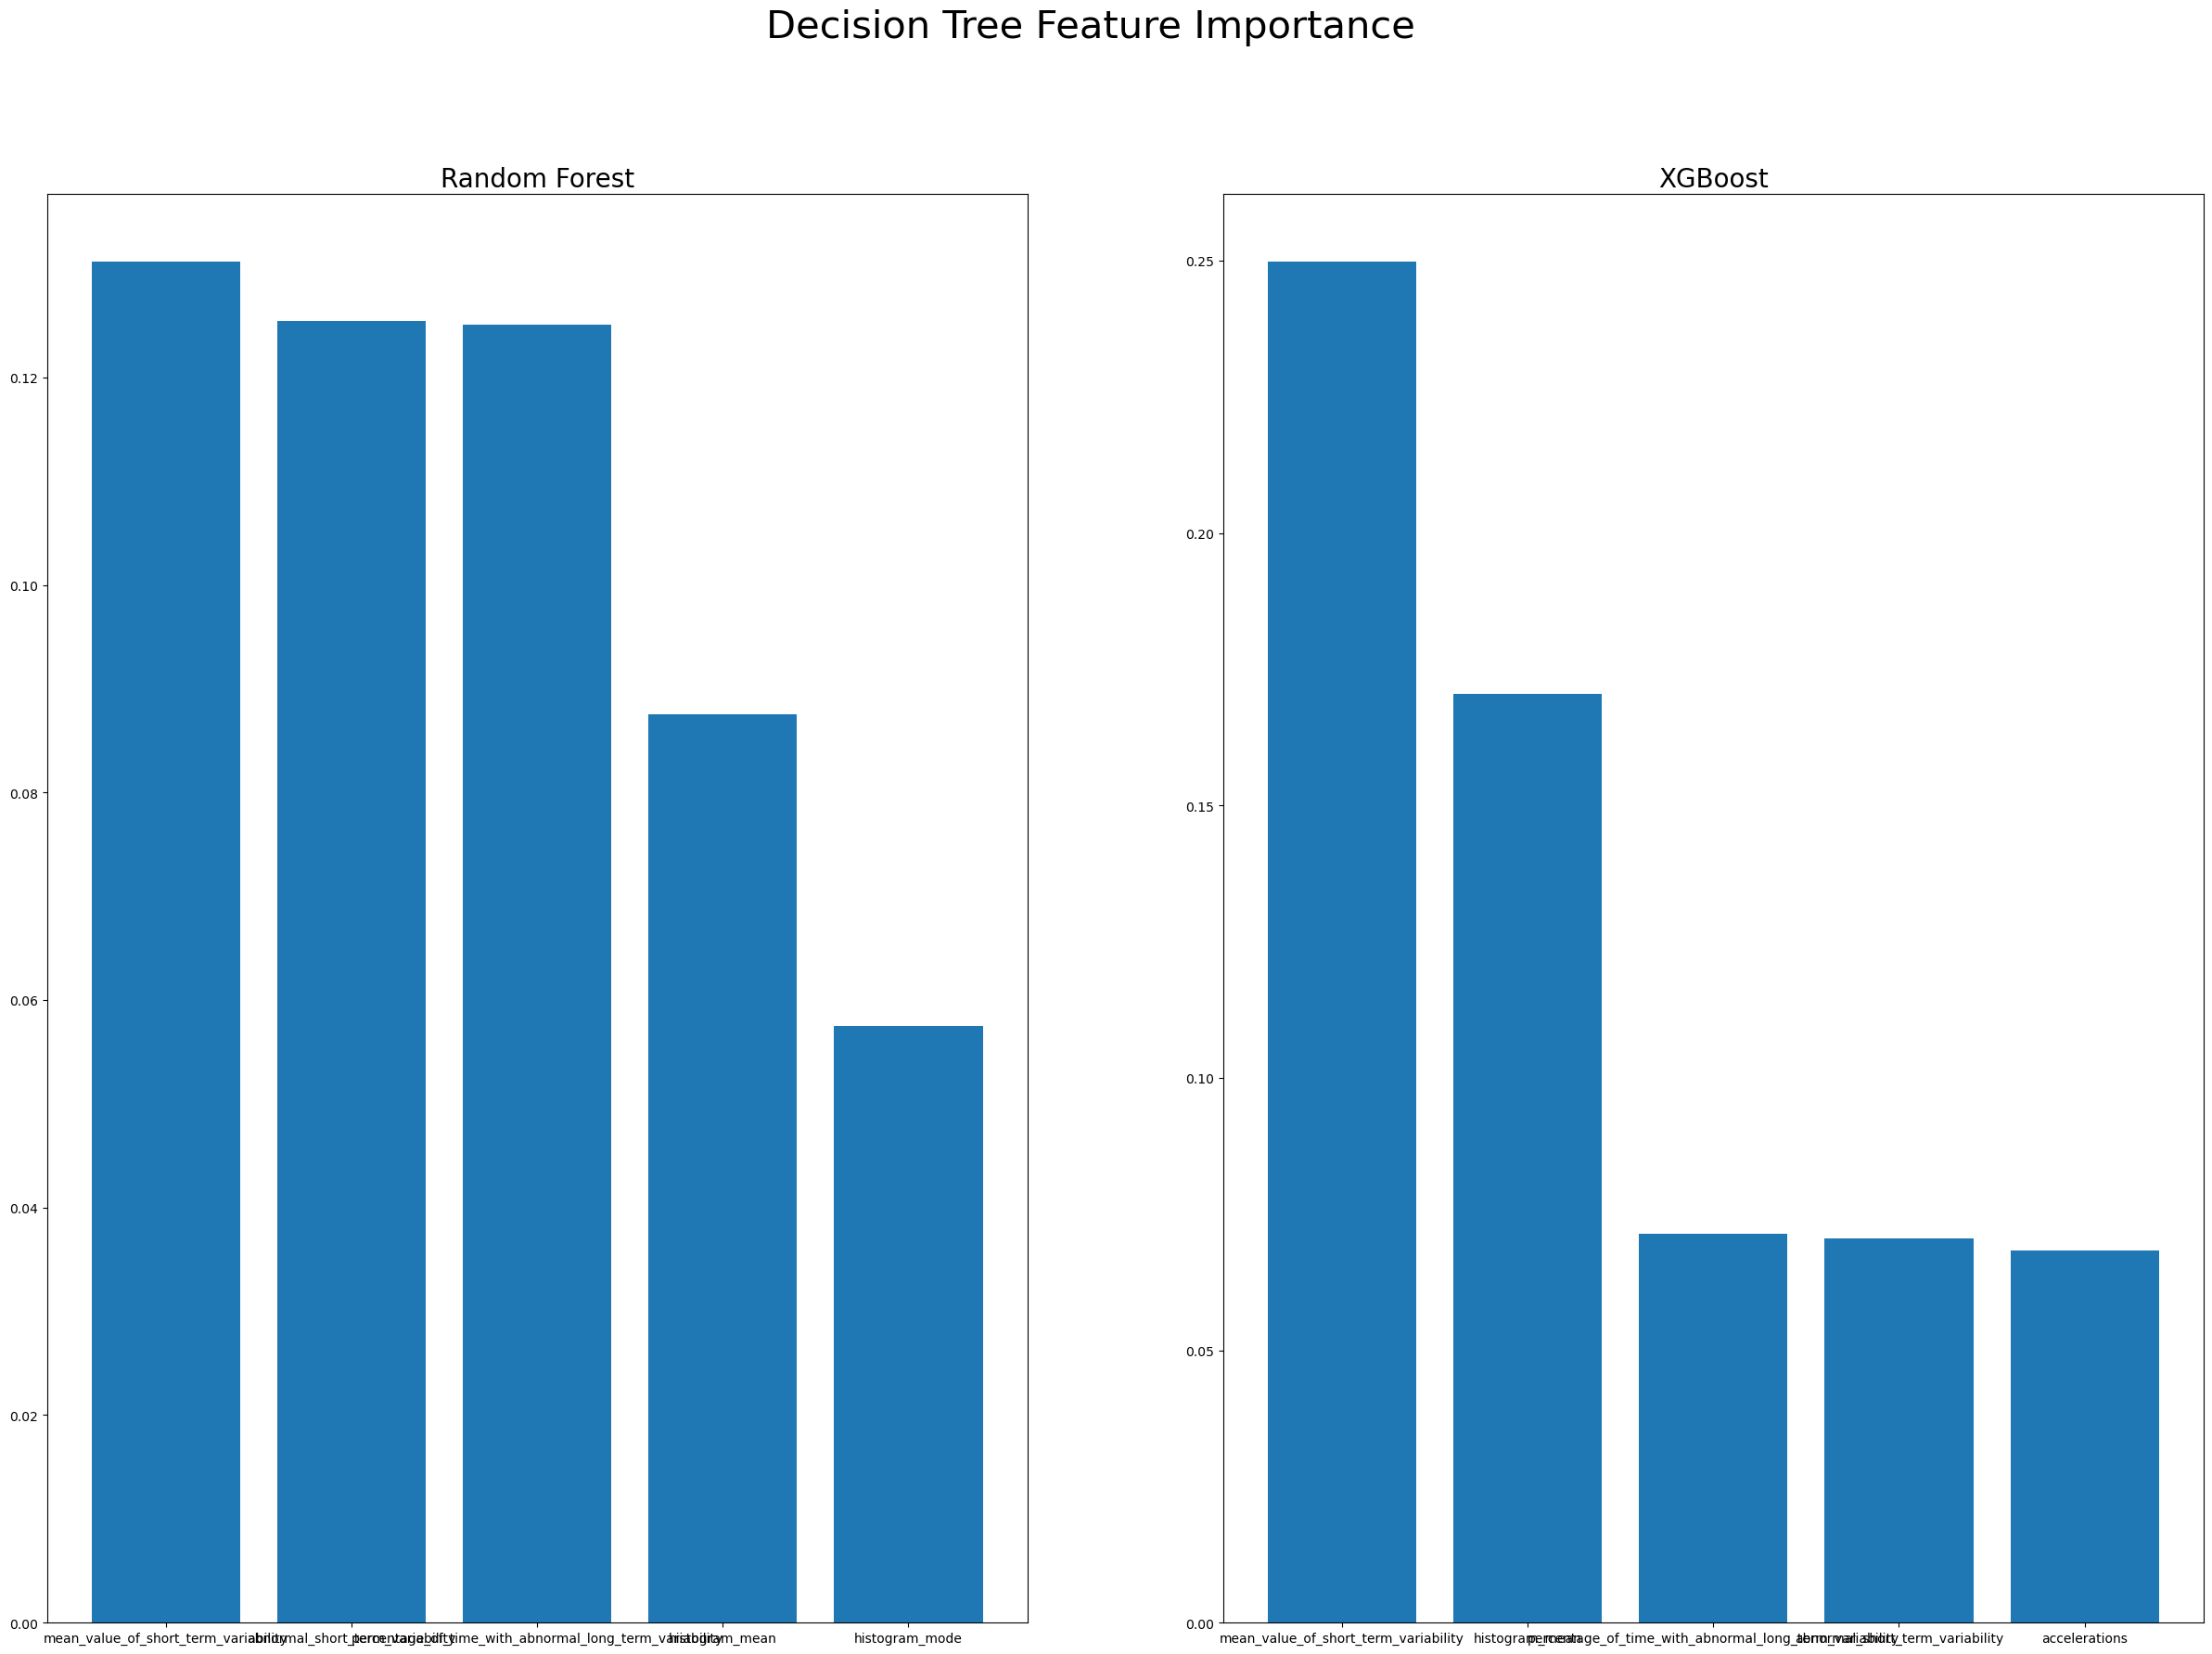

In [18]:
# print top 5 features from both models with corresponding importance
print('Random Forest top 5 features: ', rf_top5_features, "\nimportance: ", rf_highest_importances)
print("\n\n")
print('XGBoost top 5 features: ', XGB_top5_features, "importance: ", XGB_highest_importances)

# plot with 2 figures side by side (x axis is the top 5 features) 
fig, axs = plt.subplots(1, 2, figsize=(30, 20))
fig.suptitle('Decision Tree Feature Importance', fontsize=30)
axs[0].bar([x for x in rf_top5_features], rf_highest_importances)
axs[0].set_title('Random Forest', fontsize=20)
axs[1].bar([x for x in XGB_top5_features], XGB_highest_importances)
axs[1].set_title('XGBoost', fontsize=20)
plt.show()

From the output above, we can see there is 4 common features in the 5 features with the highest importance from both models:
- mean_value_of_short_term_variability
- histogram mean
- percentage_of_time_with_abnormal_long_term_variability
- abnormal_short_term_variability

It is important to note that "mean_value_of_short_term_variability" feature stands out as the feature with the highest importance, using Decision Tree Feature Importance.